# Data Exploration

## Summary
- There appears to be weak linear correlation between many of the features and the target to predict (MedHouseVal)
- Coordinate data appears to contain the most useful information. Can try to enhance this by:
  - Proximity to a major city
  - Proximity to the coast
  - Clustering
- Other things to try:
  - Augment data by combining features
  - Collect more housing data

## Contents
- [Initial Exploration](#initial-exploration)
- [Feature Correlation](#feature-correlation)
- [Feature Distributions](#feature-distributions)
- [Plot House Values on the Map](#plot-house-values-on-the-map)
- [Add Feature Combinations](#add-feature-combinations)
- [Clustering](#clustering)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
train = pd.read_csv('data\\train.csv')
train.set_index('id', inplace=True)
train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
id,,,,,,,,,
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


## Initial Exploration

In [3]:
train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


In [4]:
train.shape

(37137, 9)

---

## Feature Correlation

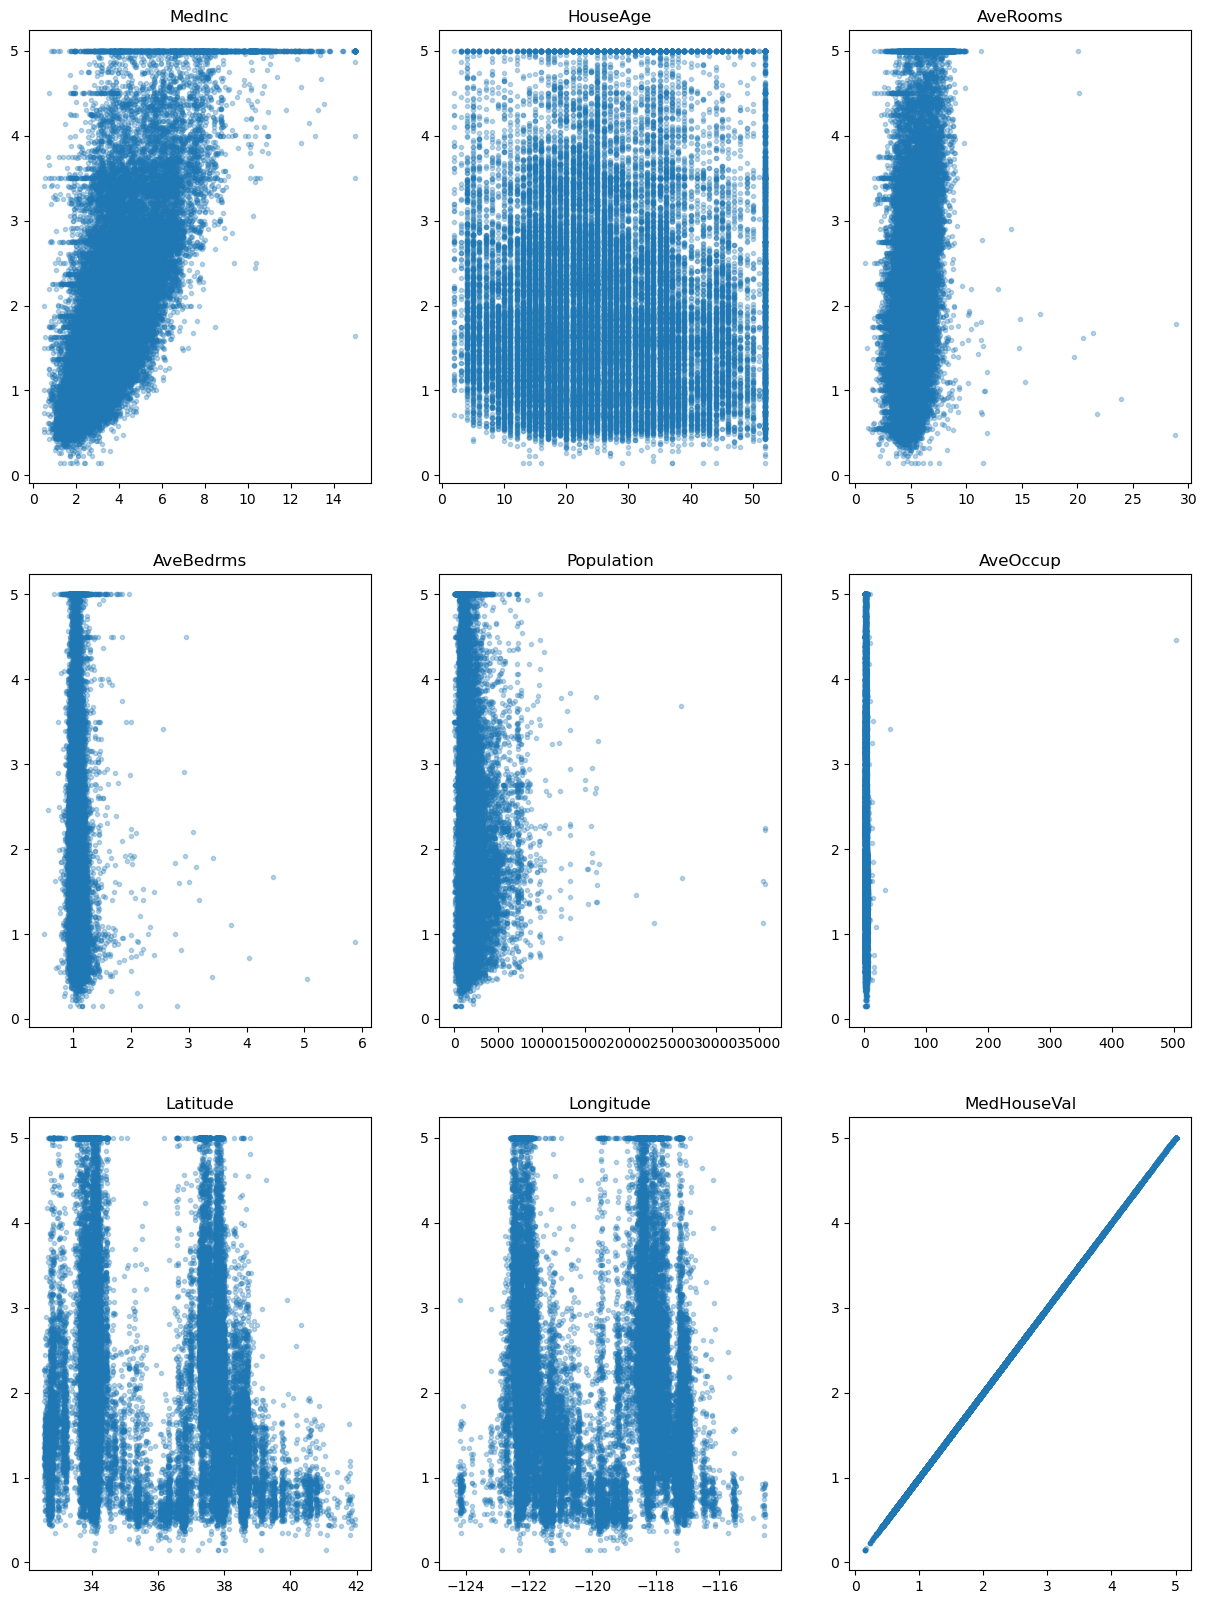

In [5]:
cols = np.array(train.columns).reshape([-1, 3])
fig, axs = plt.subplots(*cols.shape)
fig.set_figwidth(15)
fig.set_figheight(20)

for i, col_double in enumerate(cols):
    for j in range(cols.shape[1]):
        axs[i, j].set_title(cols[i, j])
        axs[i, j].plot(train[col_double[j]], train['MedHouseVal'], '.', alpha=0.3)

In [6]:
corr_matrix = train.corr()
corr_matrix['MedHouseVal'].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.701925
AveRooms       0.366727
HouseAge       0.103210
Population    -0.038479
AveOccup      -0.048475
Longitude     -0.056742
AveBedrms     -0.067487
Latitude      -0.116499
Name: MedHouseVal, dtype: float64

### Observations
- Median income has a high linear correlation with median house value
- Most features have weak linear correlation with median house value
- Some features have horizontal line artifacts (e.g. median income) which means that there's a high variation in x for a given house value
- AveOccup has an outlier at 500 persons in one house!

---

## Feature Distributions

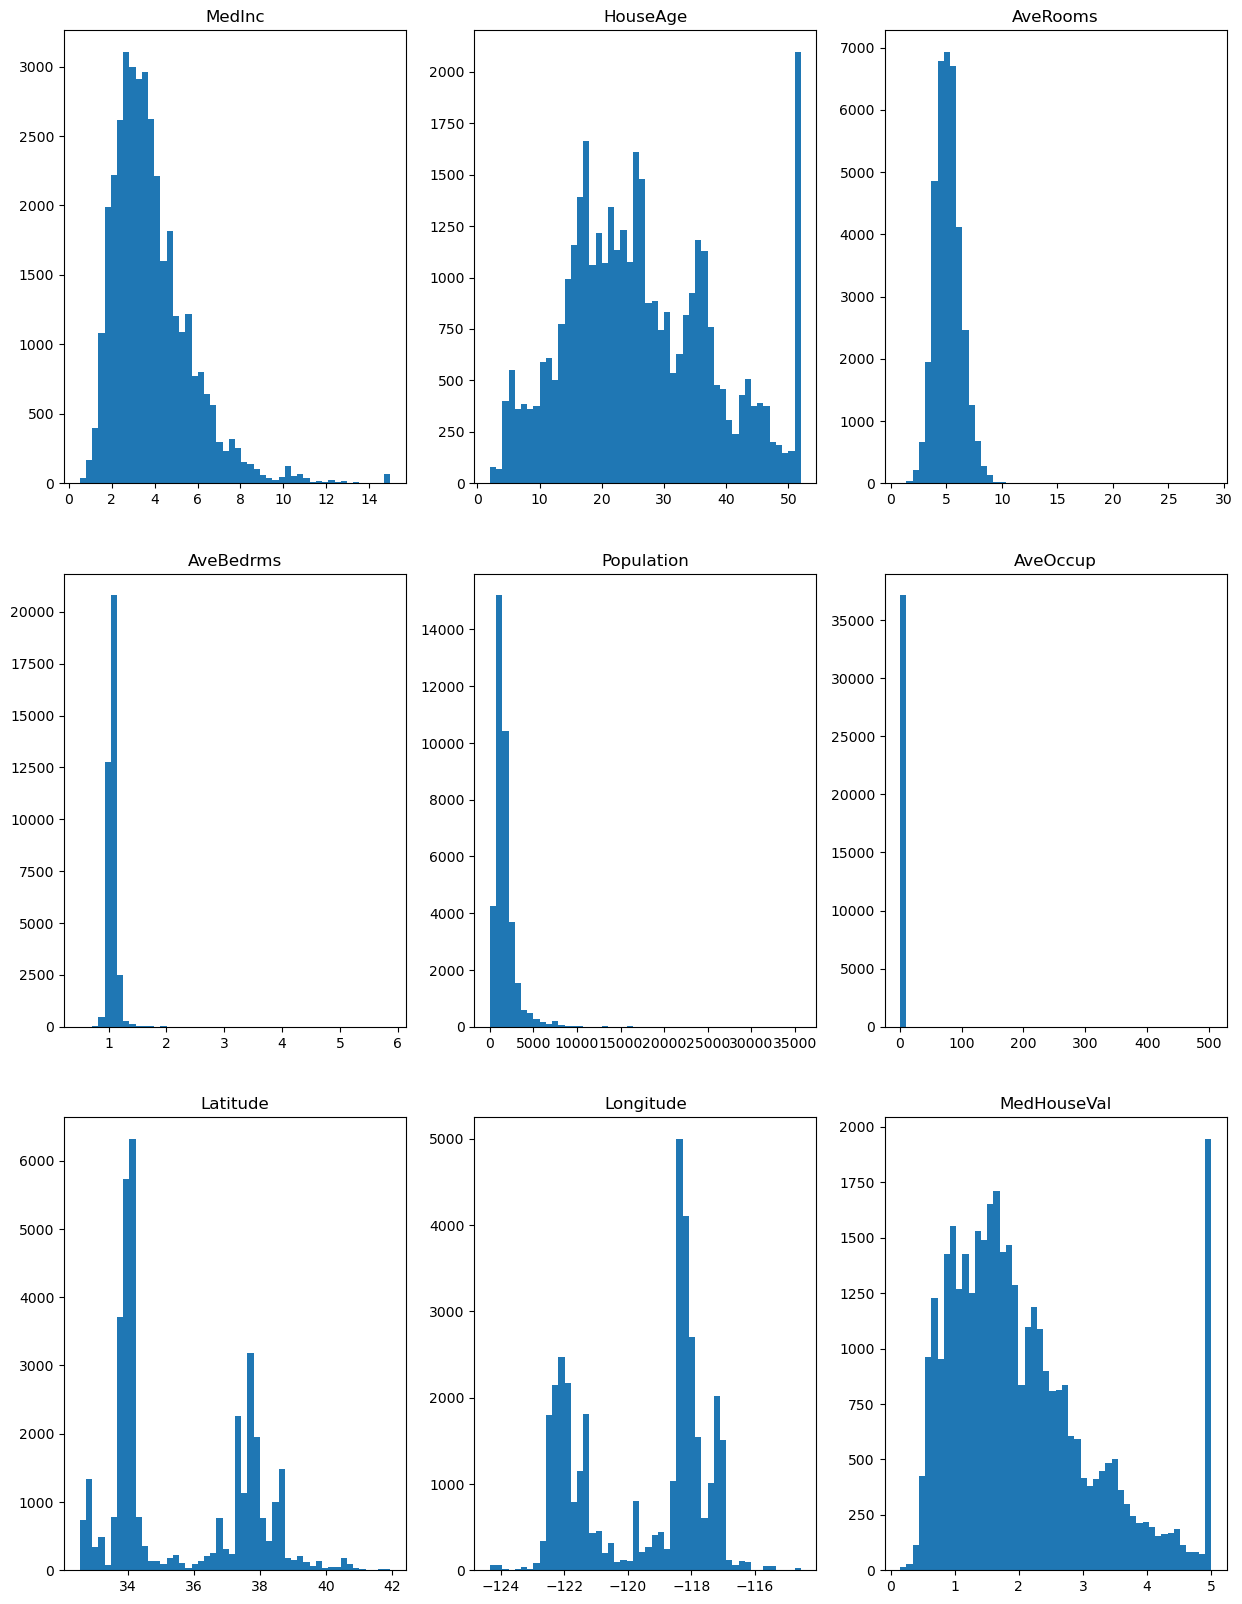

In [7]:
cols = np.array(train.columns).reshape([-1, 3])
fig, axs = plt.subplots(*cols.shape)
fig.set_figwidth(15)
fig.set_figheight(20)

for i, col_double in enumerate(cols):
    for j in range(cols.shape[1]):
        axs[i, j].set_title(cols[i, j])
        axs[i, j].hist(train[col_double[j]], bins=50)


### Observations
- HouseAge and MedHouseVal have spikes at the top end of their range
- The distribution of MedInc and Population appears to peak early and then tail off whereas AveRooms and AveBedrms are more symmetrical
- AveOccup is generally between 1 and 3 but there is an outlier at about 500 (see [Feature Correlation](#feature-correlation) section)
- Longitude and Latitude each have 2 peaks. Each peak in one has another of similar size in the other (this suggests high density urban area in two places which is also shown in the next section)

---

## Plot House Values on the Map

In [8]:
def plot_map(column_name: str):
    with Image.open('img\\map.png') as img:
        # set figure size
        fig = plt.figure()
        fig.set_figwidth(10)
        fig.set_figheight(10)
        
        # plot image
        plt.imshow(img)
        width, height = img.size
        
        # scale data to image
        lon_scale = train['Longitude'] - train['Longitude'].min()
        lon_scale = (lon_scale * width) / lon_scale.max()
        # scale in reverse because (0,0) is top-left for images
        lat_scale = train['Latitude'] - train['Latitude'].max()
        lat_scale = (lat_scale * height) / lat_scale.min()
        
        # plot data
        plt.scatter(lon_scale, lat_scale, c=train['MedHouseVal'], marker='.', alpha=0.5)
        
        # format axes
        fig.axes[0].get_xaxis().set_ticks([0, width], labels=[train['Longitude'].min(), train['Longitude'].max()])
        fig.axes[0].get_yaxis().set_ticks([0, height], labels=[train['Latitude'].max(), train['Latitude'].min()])
        plt.xlabel('longitude')
        plt.ylabel('latitude')
        
        # add colorbar
        plt.colorbar()

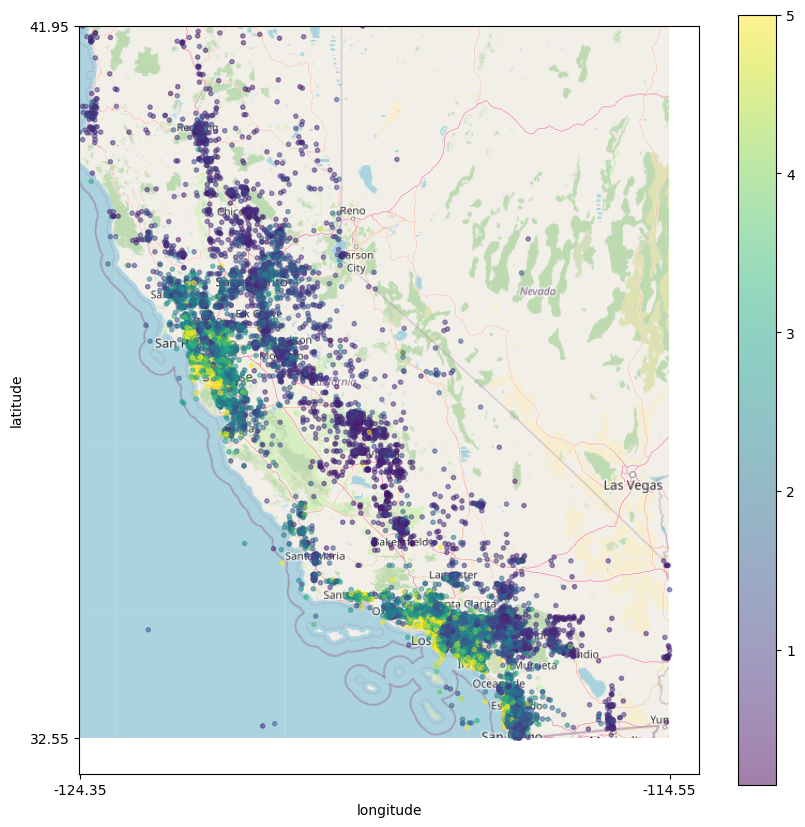

In [9]:

plot_map('MedHouseVal')

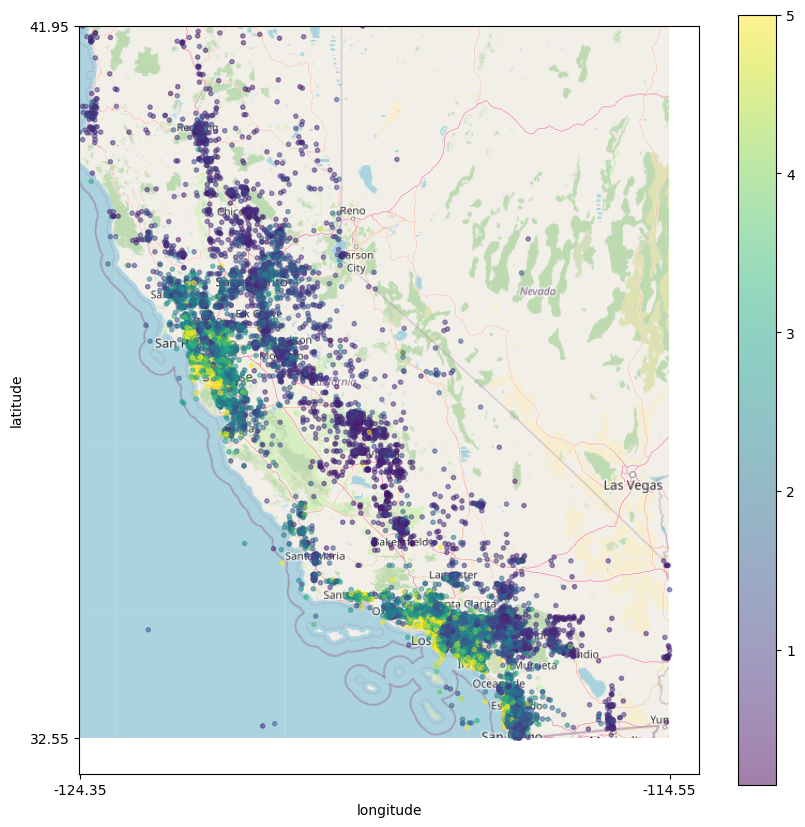

In [10]:
plot_map('MedInc')

### Observations
- The houses with the highest median value are clustered around San Francisco, San Hose and Los Angeles
- Median house value tends to be higher near the coast and decrease the further inland they are
- The highest and lowest median house values seem as though they could be split by a straight line from North-West to South-East

---

## Add Feature Combinations
- This is to see if we can create any new informative features for the model to use

In [11]:
# commented out series have weak correlations
train['RoomsPerBedrm'] = train['AveRooms'] / train['AveBedrms']
train['MedIncPerPop'] = train['MedInc'] / train['Population']
# train['HouseAgePerPop'] = train['HouseAge'] / train['Population']
train['AveOccupPerRoom'] = train['AveOccup'] / train['AveRooms']
# train['AveOccupPerPop'] = train['AveOccup'] / train['Population']
train['MedIncPerRoom'] = train['MedInc'] / train['AveRooms']
train['MedIncPerBedrm'] = train['MedInc'] / train['AveBedrms']

Correlation Matrix

In [12]:
corr_matrix = train.corr()
corr_matrix['MedHouseVal'].sort_values(ascending=False)

MedHouseVal        1.000000
MedInc             0.701925
MedIncPerBedrm     0.687513
MedIncPerRoom      0.676037
RoomsPerBedrm      0.395650
AveRooms           0.366727
MedIncPerPop       0.112488
HouseAge           0.103210
Population        -0.038479
AveOccup          -0.048475
Longitude         -0.056742
AveBedrms         -0.067487
Latitude          -0.116499
AveOccupPerRoom   -0.184431
Name: MedHouseVal, dtype: float64

### Thoughts
- Some of the new features have higher correlation than some of the original features:
  - hopefully, this will improve model performance
  - although it may not add much new information for a model to use

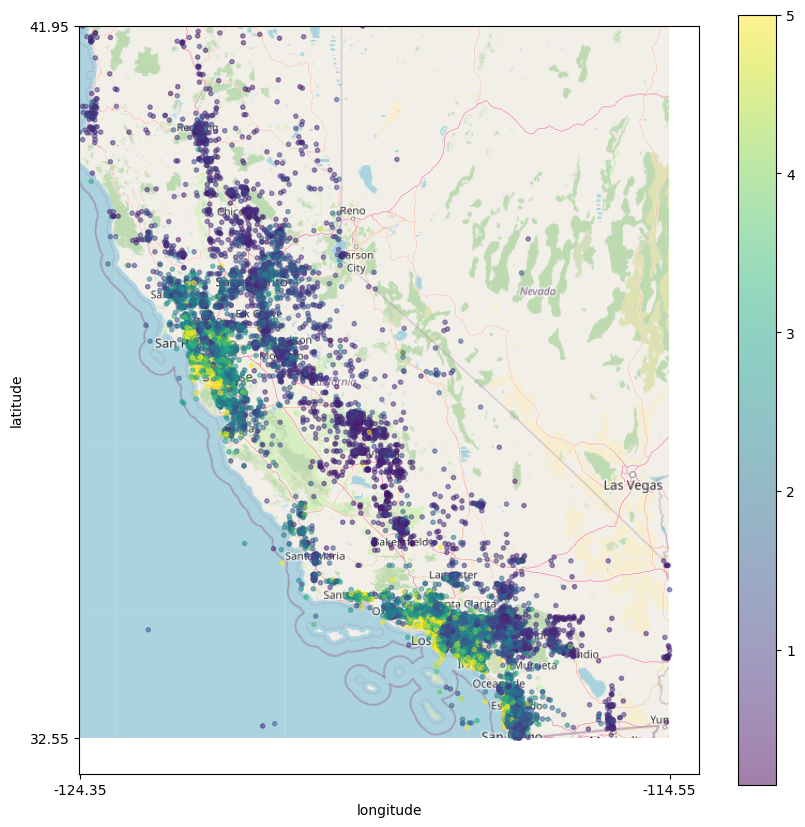

In [13]:
plot_map('MedIncPerBedrm')

---

## Clustering
- From [the map](#plot-house-values-on-the-map), houses of similar value seem to be located near to each other
- Finding the nearest cluster of a house may be a good indicator of its value

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [15]:
X, y = train.drop('MedHouseVal', axis=1), train['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,RoomsPerBedrm,MedIncPerPop,AveOccupPerRoom,MedIncPerRoom,MedIncPerBedrm
id,,,,,,,,,,,,,
12712,0.9583,6.0,3.181818,1.000000,833.0,2.000000,34.17,-118.30,3.181818,0.001150,0.628571,0.301180,0.958300
10983,4.0023,12.0,5.442424,1.050000,1141.0,2.845455,34.96,-120.41,5.183261,0.003508,0.522829,0.735389,3.811714
3725,2.2544,16.0,4.158379,1.046322,4662.0,3.069982,38.70,-122.36,3.974284,0.000484,0.738264,0.542134,2.154596
32554,2.7000,22.0,5.269231,1.063187,1052.0,2.859890,38.95,-122.63,4.956072,0.002567,0.542753,0.512409,2.539535
16990,2.3789,26.0,2.991525,1.067797,2129.0,2.427966,34.06,-118.28,2.801587,0.001117,0.811615,0.795213,2.227859


In [16]:
X_train.shape

(29709, 13)

In [17]:
X_train_location = X_train.loc[:, 'Latitude':'Longitude']
X_train_location.head()

,Latitude,Longitude
id,,
12712,34.17,-118.30
10983,34.96,-120.41
3725,38.70,-122.36
32554,38.95,-122.63
16990,34.06,-118.28


In [18]:
kmeans = KMeans(n_clusters=25, n_init='auto')
kmeans.fit(X_train_location)

KMeans(n_clusters=25, n_init='auto')

Text(0, 0.5, 'latitude')

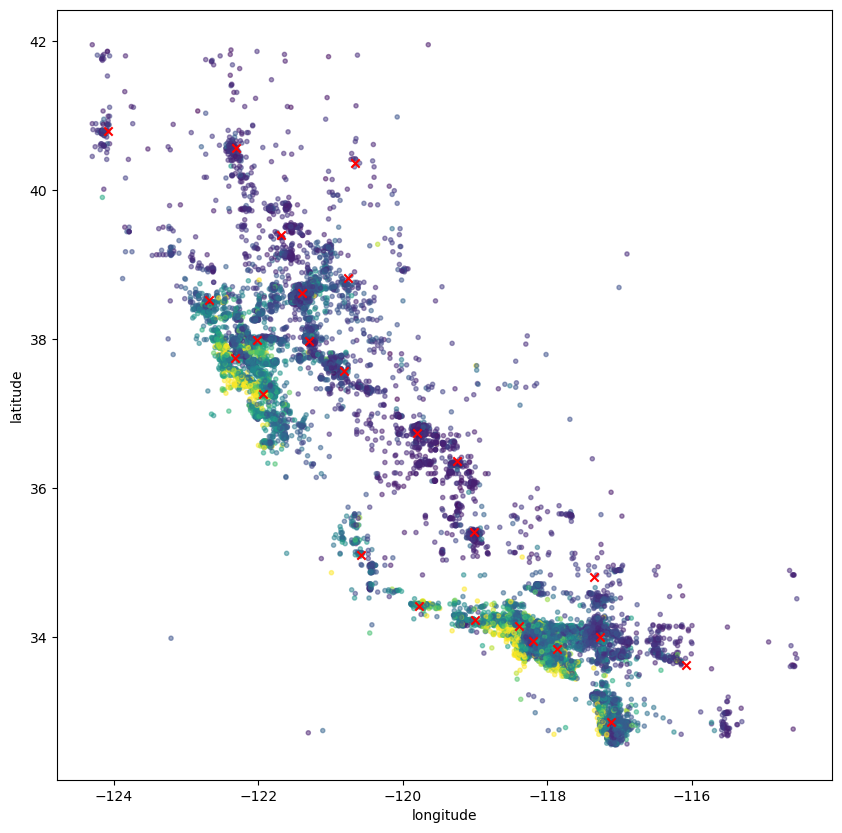

In [19]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
plt.scatter(X_train_location['Longitude'], X_train_location['Latitude'], c=y_train, marker='.', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], marker='x', c='#ff0000')
plt.xlabel('longitude')
plt.ylabel('latitude')

- The cluster locations appear to be fairly similar on successive runs

In [20]:
# Add cluster locations to training data
predictions = kmeans.predict(X_train_location)
centers = np.array([kmeans.cluster_centers_[pred] for pred in predictions])
X_train['ClusterLabel'] = predictions
X_train['NearestClustLat'] = centers[:, 0]
X_train['NearestClustLon'] = centers[:, 1]
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,RoomsPerBedrm,MedIncPerPop,AveOccupPerRoom,MedIncPerRoom,MedIncPerBedrm,ClusterLabel,NearestClustLat,NearestClustLon
id,,,,,,,,,,,,,,,,
12712,0.9583,6.0,3.181818,1.000000,833.0,2.000000,34.17,-118.30,3.181818,0.001150,0.628571,0.301180,0.958300,20,34.144428,-118.398497
10983,4.0023,12.0,5.442424,1.050000,1141.0,2.845455,34.96,-120.41,5.183261,0.003508,0.522829,0.735389,3.811714,22,35.103733,-120.583502
3725,2.2544,16.0,4.158379,1.046322,4662.0,3.069982,38.70,-122.36,3.974284,0.000484,0.738264,0.542134,2.154596,12,38.515932,-122.689110
32554,2.7000,22.0,5.269231,1.063187,1052.0,2.859890,38.95,-122.63,4.956072,0.002567,0.542753,0.512409,2.539535,12,38.515932,-122.689110
16990,2.3789,26.0,2.991525,1.067797,2129.0,2.427966,34.06,-118.28,2.801587,0.001117,0.811615,0.795213,2.227859,9,33.947062,-118.202103


Gauge how useful of a feature the clusters may be

In [21]:

df = pd.concat([X_train['ClusterLabel'], y_train], axis=1)
df.head()

,ClusterLabel,MedHouseVal
id,,
12712,20,1.625
10983,22,0.979
3725,12,1.260
32554,12,0.938
16990,9,1.750


In [22]:
result = df.groupby('ClusterLabel').describe()['MedHouseVal'].sort_values(by='mean', ascending=False)
result


,count,mean,std,min,25%,50%,75%,max
ClusterLabel,,,,,,,,
7,175.0,2.957881,1.158103,0.55000,2.19350,2.6430,3.67200,5.00001
20,3866.0,2.915357,1.202040,0.60900,1.94100,2.6210,3.75000,5.00001
11,2457.0,2.856415,1.064208,0.54000,2.13200,2.6450,3.45500,5.00001
6,3226.0,2.622551,1.203368,0.14999,1.70400,2.4585,3.44700,5.00001
24,484.0,2.573721,0.991525,0.50000,1.89600,2.4055,3.12700,5.00001
1,3241.0,2.310622,0.974606,0.51200,1.63500,2.0690,2.71800,5.00001
2,1236.0,2.104345,0.919634,0.55900,1.44250,1.9055,2.62000,5.00001
9,4769.0,2.069937,1.010975,0.37500,1.40300,1.7660,2.43400,5.00001
12,472.0,1.871555,0.775758,0.47500,1.32525,1.7910,2.33500,5.00001


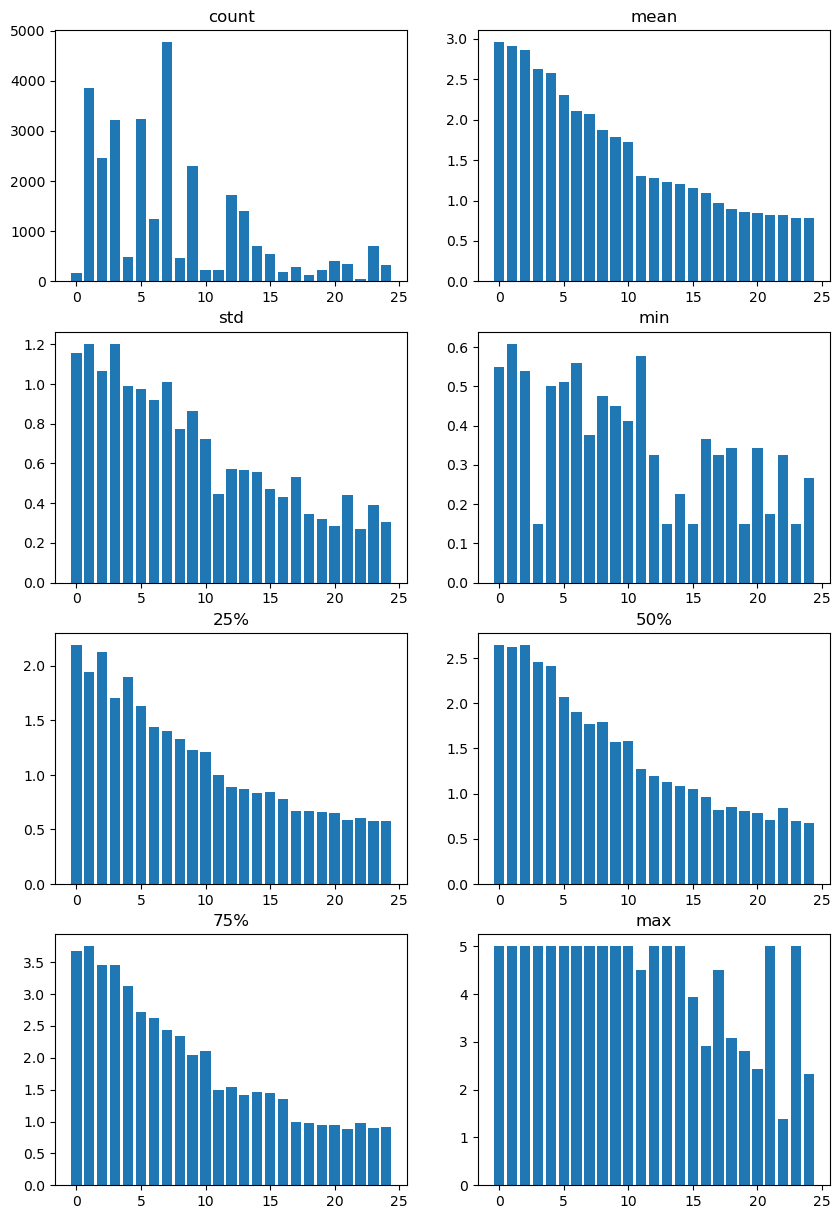

In [23]:
fig, axs = plt.subplots(4, 2)
fig.set_figwidth(10)
fig.set_figheight(15)

for i, stat in enumerate(result.columns):
    axs[i // 2, i % 2].set_title(stat)
    axs[i // 2, i % 2].bar(range(len(result[stat])), result[stat])    

### Observations
- Looking at the mean and std graphs
  - As the mean decreases so does std 
    - so clusters that have lower mean generally have a smaller spread of MedHouseVal
    - but clusers with higher mean have a higher spread of MedHouseVal, suggesting that those cluster may be less useful for helping to predict MedHouseVal
- Will have to test the clustering to see if it helps the model's prediction